In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv("loan_data.csv")
cell_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## dengan menggunakan KNN

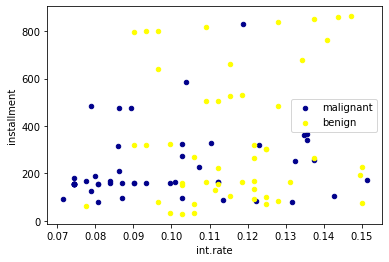

In [3]:
ax = cell_df[cell_df['not.fully.paid'] == 0][0:50].plot(kind='scatter',
                                               x='int.rate',
                                               y='installment',
                                               color='DarkBlue',
                                               label='malignant');
cell_df[cell_df['not.fully.paid'] == 1][0:50].plot(kind='scatter',
                                          x='int.rate',
                                          y='installment',
                                          color='Yellow',
                                          label='benign',
                                          ax=ax);
plt.show()

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=4)
print ('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (7662, 4) (7662,)
Test set: (1916, 4) (1916,)


## dengan menggunakan svm

In [4]:
cell_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
nilai_df = cell_df[['int.rate','installment','dti','fico']]
X = np.asarray(nilai_df)
X[0:5]

array([[1.1890e-01, 8.2910e+02, 1.9480e+01, 7.3700e+02],
       [1.0710e-01, 2.2822e+02, 1.4290e+01, 7.0700e+02],
       [1.3570e-01, 3.6686e+02, 1.1630e+01, 6.8200e+02],
       [1.0080e-01, 1.6234e+02, 8.1000e+00, 7.1200e+02],
       [1.4260e-01, 1.0292e+02, 1.4970e+01, 6.6700e+02]])

In [6]:
y=np.asarray(cell_df['inq.last.6mths'])
y[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC()

In [9]:
yhat=clf.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54       714
           1       0.00      0.00      0.00       503
           2       0.00      0.00      0.00       276
           3       0.00      0.00      0.00       182
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00        51
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00    

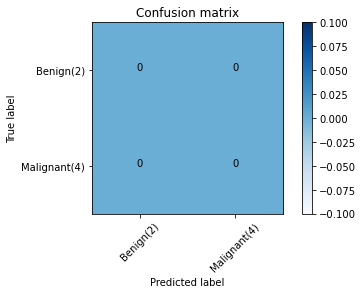

In [12]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat))

#plot non-normalize confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = ['Benign(2)',
                                    'Malignant(4)'],
                     normalize=False, title='Confusion matrix')

In [13]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,average='micro')

0.2289929441949968

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.2023369345197933

In [15]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train,y_train)
yhat2 = clf2.predict(X_test)
print('Avg F1-score: %.4f' %f1_score(y_test,yhat2,average='weighted'))
print('Jaccard score: %.4f' %jaccard_score(y_test,yhat2,average='micro'))

Avg F1-score: 0.2023
Jaccard score: 0.2290


## dengan decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [21]:
LoanTree = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
LoanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
predTree = LoanTree.predict(X_test)

In [25]:
from sklearn import metrics
print("Decision Trees's Accuracy: ",metrics.accuracy_score(y_test,predTree))

Decision Trees's Accuracy:  0.3763048016701461


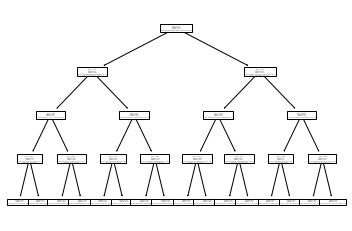

In [26]:
tree.plot_tree(LoanTree)
plt.show()